## Epymorph dev log: June 20th, 2023

Author: Alexander Nez

as of git hash: 50645d5e6efc58ffc1443a81c308b185288cdbbe

This notebook contains useful python and pandas function to access data within the geo database

# Why we should we scale some data points. 


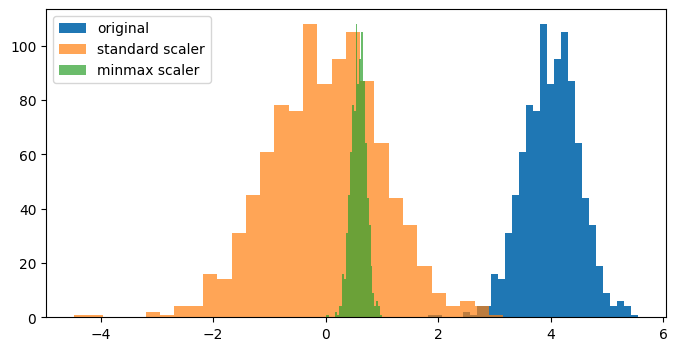

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Generate a distribution
x = 0.5*np.random.randn(1000)+4

# Standard (mean=0, stdev=1) Scaler
y = (x-np.mean(x))/np.std(x)

# Min-Max (0-1) Scaler
z = (x-np.min(x))/(np.max(x)-np.min(x))

plt.figure(figsize=(8,4))
plt.hist(x, bins=30, label='original')
plt.hist(y, alpha=0.7, bins=30, label='standard scaler')
plt.hist(z, alpha=0.7, bins=30, label='minmax scaler')
plt.legend()
plt.show()

dict_keys(['labels', 'population', 'centroid', 'median_age', 'pop_by_age', 'median_income', 'total_income', 'average_household_size', 'pop_density_km2', 'tract_gini_index'])
70340.46027944112
36133.353731779556


AttributeError: Line2D.set() got an unexpected keyword argument 'y'

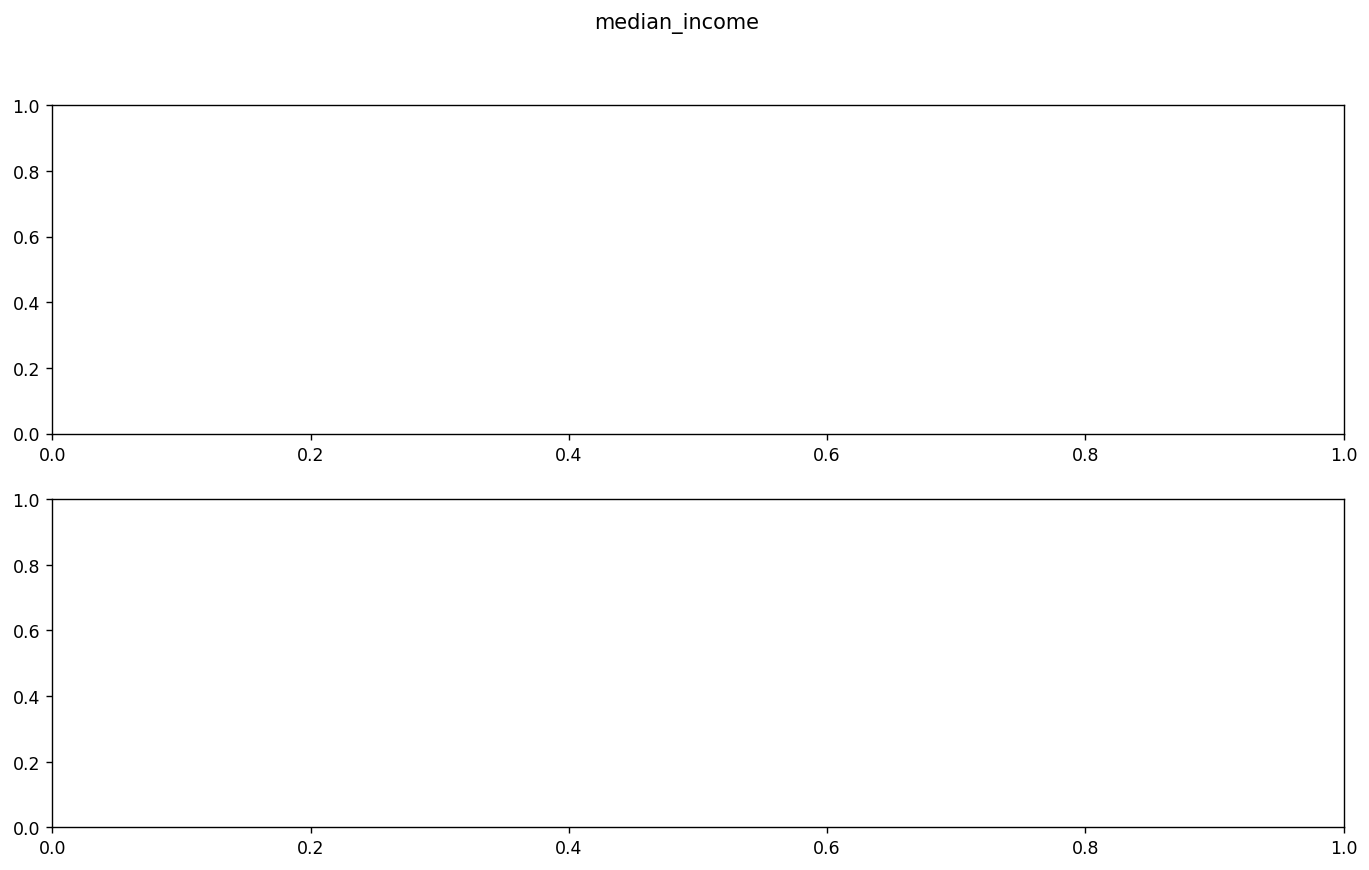

In [7]:
import numpy as np
import pandas as pd
from numpy.typing import DTypeLike, NDArray
import matplotlib.pyplot as plt
with np.load(f"./epymorph/data/geo/maricopa_cbg_2019_geo.npz") as npz_data:
        data = dict(npz_data)

print(data.keys())
key = str(input('Enter a data dictionary key: '))
# Standard (mean = 70340.46, stdev = 36133.35) Scaler
standard_y = (data[key] - data[key].mean()) / data[key].std()
print(data[key].mean())
print(data[key].std())
# Min-Max (0-1) Scaler
minmax_z = (data[key]-data[key].min())/(data[key].max()-data[key].min())

fig, axs = plt.subplots(2,figsize=(13.33,7.5), dpi=125)
fig.suptitle(key)
plt.axvline(y = 0.01, color = 'r', linestyle = 'dotted')
axs[0].hist(data[key], bins=30, label='original')
axs[1].hist(standard_y, alpha=0.7, bins=30, label='standard scaler')
axs[1].hist(minmax_z, alpha=0.7, bins=30, label='minmax scaler')
plt.legend()
plt.show()



# Differnces between scaled values

In [10]:
key1 = 'average_household_size'
key2 = "pop_density_km2"

a = [0.1, 0.63, 0.23]

scale_x1 = (data[key1][0] - data[key1].mean()) / data[key1].std()
scale_x2 = (data[key2][0] - data[key2].mean()) / data[key2].std()

minmax_x1 = (data[key1][0] - data[key1].min()) /( data[key1].max() - data[key1].min())
minmax_x2 = (data[key2][0] - data[key2].min()) / (data[key2].max() - data[key2].min())

standard = np.exp(a[0] + (a[1] * scale_x1) * (a[2] * scale_x2))
MinMax = np.exp(a[0] + (a[1] * minmax_x1) * (a[2] * minmax_x2))
unscaled = np.exp(a[0] + (a[1] * data[key1][0]) * (a[2] * data[key2][0]))

print('Standard scaled value: ',standard)
print('MinMax value: ',MinMax)
print('Unscaled value: ',unscaled)




Standard scaled value:  1.223035832136034
MinMax value:  1.105602473580907
Unscaled value:  401393619874018.25


In [22]:
key1 = 'pop_density_km2'
value = data[key1].max()

scale_x1 = (value - data[key1].mean()) / data[key1].std()
print(scale_x1)


7.058640433241187


In [15]:
value = 250001
key3 = 'median_income'
scale_g1 = (value - data[key3].mean()) / data[key3].std()
scale_g2 = (data[key3][0] - data[key3].mean()) / data[key3].std()
print(scale_g1)

4.972152351375734


In [5]:
id = 27


print(data['labels'][id])


040130405132


In [6]:
import numpy as np
df = pd.DataFrame({k: list(v) for k, v in data.items()})
print(df[df.eq('040130405132').any(axis=1)])
print(data['median_income'].mean())
print(91 + 664+ 77)

new_data = np.savez('hightest_pop',df.nlargest(5, 'population').to_numpy())


          labels  population                               centroid  \
27  040130405132        1731  [-112.370603112775, 33.6779645730421]   

    median_age                  pop_by_age  median_income  total_income  \
27        73.1  [0, 12, 71, 225, 620, 803]          50793      69154500   

    average_household_size  pop_density_km2  tract_gini_index  
27                    1.76       908.089882            0.3742  
70340.46027944112
832


/Users/alexandernez/Desktop/Github/Epymorph/.venv/lib/python3.11/site-packages/pandas/core/ops/array_ops.py:82: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


{'bodies': [<matplotlib.collections.PolyCollection at 0x13d9161d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x13dcab550>,
 'cmins': <matplotlib.collections.LineCollection at 0x13dc0ced0>,
 'cbars': <matplotlib.collections.LineCollection at 0x13dd4e610>}

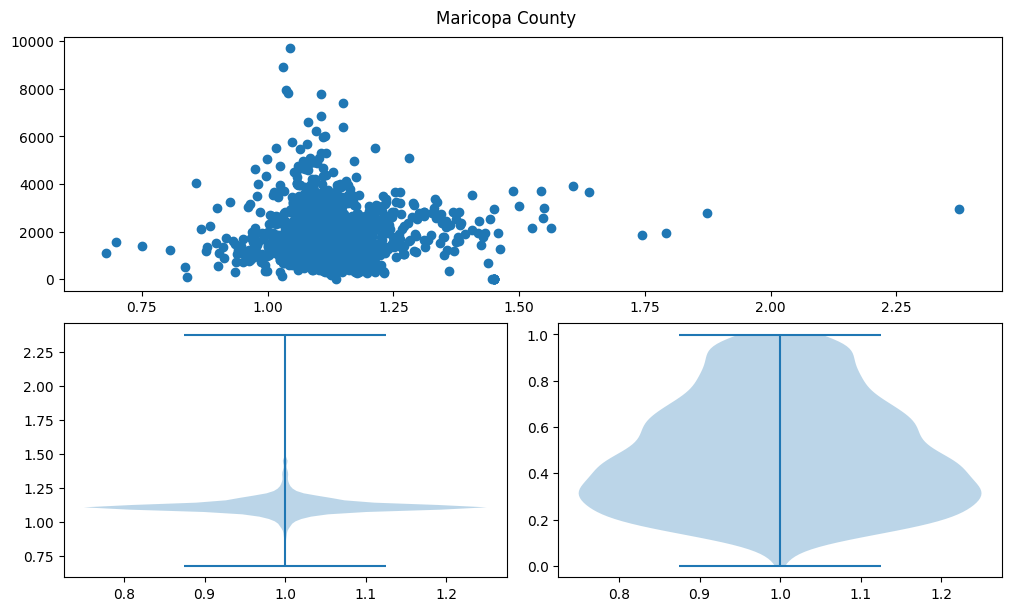

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6), layout="constrained")
spec = fig.add_gridspec(2, 2)
fig.suptitle('Maricopa County')

ax0 = fig.add_subplot(spec[0, :])
ax10 = fig.add_subplot(spec[1, 0])
ax11 = fig.add_subplot(spec[1, 1])

ax0.scatter(df['beta'],df['population'])
ax10.violinplot(df['beta'])
ax11.violinplot(df['gamma'])


ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 10


# Haversine formula

In [8]:

# lon , lat
n = len(data['labels'])
distance = np.zeros((n,n))
def haversine(centroid_1_lon: float,
              centroid_1_lat: float,
              centroid_2_lon: float, 
              centroid_2_lat: float) -> np.double:

    R = 3959.87433 

    dLat = np.radians(centroid_1_lat - centroid_2_lat)
    dLon = np.radians(centroid_1_lon - centroid_2_lon)
    lat1 = np.radians(centroid_1_lat)
    lat2 = np.radians(centroid_2_lat)

    a = np.sin(dLat/2)**2 + np.cos(lat1)* np.cos(lat2)* np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    
                
    return R * c
        
for i in range(n):
       for j in range(n):
              if i != j:
                distance[i, j] = haversine(data['centroid'][i][0],
                                           data['centroid'][i][1],
                                           data['centroid'][j][0], 
                                           data['centroid'][j][1])

a = np.asarray(distance)
np.savetxt("dist.csv", a, delimiter=",")

In [31]:
centroid_1_lat= data['centroid'][0][0]
centroid_1_lon= data['centroid'][0][1]
centroid_2_lat= data['centroid'][1][0]
centroid_2_lon= data['centroid'][1][1]

R = 3959.87433 

dLat = np.radians(centroid_1_lat - centroid_2_lat)
dLon = np.radians(centroid_1_lon - centroid_2_lon)
lat1 = np.radians(centroid_1_lat)
lat2 = np.radians(centroid_2_lat)

a = np.sin(dLat/2)**2 + np.cos(lat1)* np.cos(lat2)* np.sin(dLon/2)**2
c = 2*np.arcsin(np.sqrt(a))
                
haversine_cal =  R * c
centroid = data['centroid']
    
dispersal_kernel = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dispersal_kernel[i, j] = 1 / \
            (np.exp(distance[i, j]*1/40))
    dispersal_kernel[i, ] = dispersal_kernel[i, ] / \
        sum(dispersal_kernel[i, ])
print(haversine_cal)

3.582216773539751


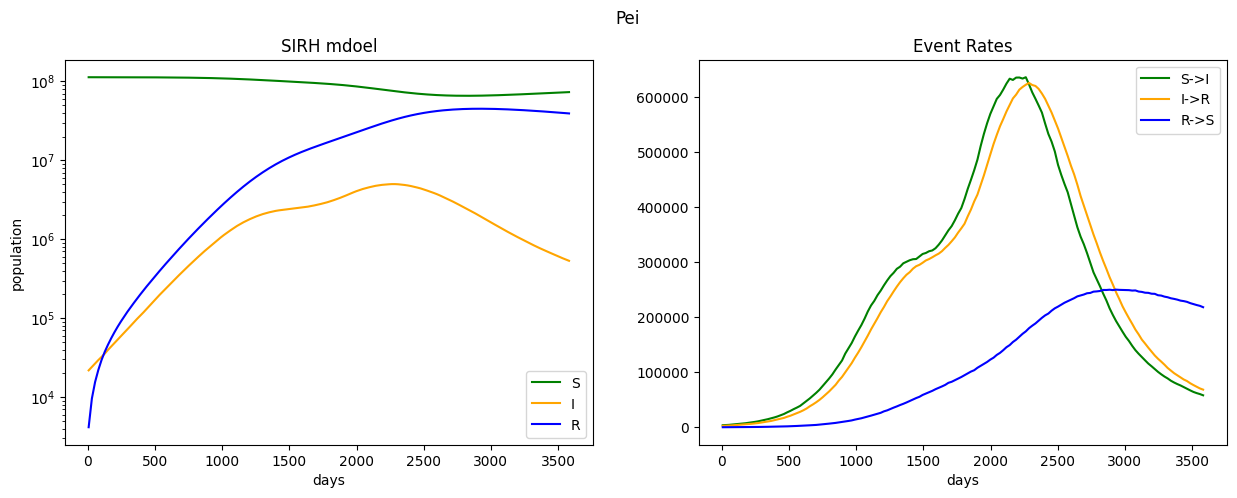

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dir = os.path.expanduser('~/Desktop/Github/Epymorph/scratch')
header_names = ['days', 'tracts', 'S', 'I', 'R', 'S->I', 'I->R', 'R->S']

plot_df = pd.read_csv(dir + '/output_files/pei.csv', header= None, skiprows = 1, names = header_names)
plot_df.to_csv(dir + '/utility/pei.csv')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
fig.suptitle('Pei')
sirh = ['S', 'I', 'R']
sirh_name = ['Susceptible', 'Infected', 'Recovered']
event_rate = ['S->I', 'I->R', 'R->S']
color = ['green', 'orange', 'blue']

Events = plot_df[['days', 'S->I', 'I->R', 'R->S']]
sirh_compartment = plot_df[['days', 'S', 'I', 'R']]
sirh_compartment = sirh_compartment.groupby(sirh_compartment['days'] // 2, sort=False).sum()
Events = Events.groupby(Events['days'] // 2, sort=False).sum()
# Plots sirh model
for i in range(3):
    sirh_compartment.plot(kind='line',
            x='days',
            y= sirh[i],
            ylabel="population", 
            logy=True,
            color=color[i], 
            ax=axes[0],
            title = 'SIRH mdoel') 
    Events.plot(kind='line', 
            x='days',
            y=event_rate[i],
            color=color[i], 
            ax=axes[1],
            title = 'Event Rates')    
# show the plot
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x13f8a5e90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x13f855390>,
 'cmins': <matplotlib.collections.LineCollection at 0x13f8b1190>,
 'cbars': <matplotlib.collections.LineCollection at 0x13f8b03d0>}

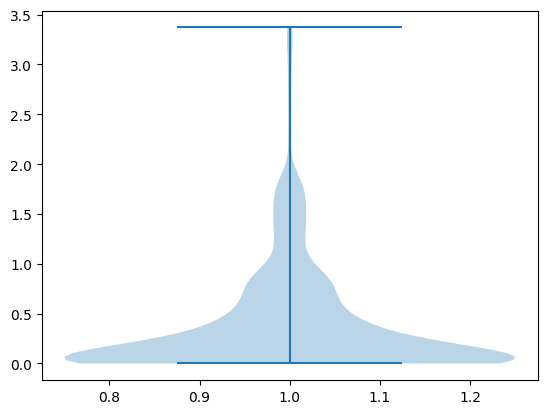

In [13]:
plt.violinplot((plot_df['I->R']/50660834) * 100)